In [6]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import time
import dlib
import numpy as np
import random
import math
import pickle
import unittest
import stripped_faceDetection as fd
import cv2

In [7]:
X = np.array([[84, 238], [87, 270], [94, 300], [101, 330], [110, 358], [126, 383], [148, 404], [172, 420], [199, 426], [226, 420], [251, 405], [273, 385], [290, 360], [299, 332], [306, 301], [312, 270], [314, 239], [102, 221], [118, 209], [138, 207], [158, 211], [177, 220], [224, 219], [243, 211], [263, 207], [282, 210], [297, 221], [200, 245], [200, 266], [200, 287], [200, 308], [179, 321], [189, 325], [200, 328], [211, 325], [221, 321], [126, 246], [139, 238], [155, 239], [169, 252], [154, 254], [137, 254], [232, 252], [245, 239], [261, 238], [274, 246], [263, 254], [247, 254], [157, 360], [174, 354], [189, 350], [200, 353], [211, 350], [226, 354], [243, 360], [226, 372], [212, 378], [200, 379], [188, 378], [174, 372], [165, 361], [189, 362], [200, 363], [211, 362], [236, 361], [211, 361], [200, 362], [189, 361]])
Y = np.array([[162, 248], [164, 283], [167, 319], [174, 352], [190, 382], [218, 404], [251, 421], [282, 434], [311, 437], [337, 429], [356, 406], [374, 381], [389, 354], [397, 325], [401, 295], [401, 265], [399, 236], [197, 221], [217, 205], [242, 201], [267, 206], [291, 215], [323, 214], [342, 206], [362, 200], [381, 201], [393, 216], [309, 234], [311, 254], [314, 275], [316, 297], [285, 311], [298, 315], [313, 318], [325, 314], [335, 310], [227, 238], [241, 230], [258, 230], [272, 241], [257, 243], [240, 243], [331, 239], [343, 227], [358, 227], [370, 234], [360, 241], [345, 241], [250, 346], [275, 342], [298, 338], [311, 340], [324, 337], [341, 341], [358, 342], [342, 367], [326, 380], [311, 383], [296, 382], [274, 373], [257, 349], [297, 344], [311, 345], [324, 343], [351, 344], [325, 364], [311, 367], [297, 366]])
arr=np.array([[0,0],
            [0,1],
            [1,1],
            [1,2],
            [1,3],
            [1,4],
            [2,4],
            [3,4],
            [4,4],
            [1,0]])
u = [400, 300]
# arr = arr[:2]
theta = 70
scale = 2.5
offset = [2.5,1.5] # [0,0] # [2.5,1.5]
R = np.array([[math.cos(math.pi*theta/180), -math.sin(math.pi*theta/180)],
             [math.sin(math.pi*theta/180), math.cos(math.pi*theta/180)]])
rotated_arr = scale * np.transpose(np.dot(R, np.transpose(arr - offset)))
zero = np.array([0,0])
# print "============="
# for i in range(len(arr)):
#     print np.linalg.norm(arr[i] - [2.5, 1.5] - zero), " ", np.linalg.norm(rotated_arr[i] - zero)
#     print np.linalg.norm(arr[i] - arr[(i+1)%len(arr)]), " ", np.linalg.norm(rotated_arr[i] - rotated_arr[(i+1)%len(arr)])

# center_w = np.sum(X, 0)*1./len(X)
# center_v = np.sum(Y, 0)*1./len(Y)
# X -= center_w
# Y -= center_v

In [8]:
transform = fd.calculateSimilarityTransform(X, Y)
transform

(0.93618390923350969, array([[ 0.99823179, -0.05944148],
        [ 0.05944148,  0.99823179]]), array([-65.94059809,   7.58046309]))

In [9]:
def closest(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    print node
    print nodes
    print dist_2
    print np.argmin(dist_2)
    return np.argmin(dist_2)
def warpPoint(u, X, Y, similarityTransform):
    S, R, t = similarityTransform # global indexing
    k_u = closest(u, X) # local indexing
    delta_x_u = u - X[k_u]
    print delta_x_u
    print Y[k_u]
    transformed_offset = 1./S * np.dot(np.transpose(R), delta_x_u)
    print transformed_offset
    print Y[k_u] + 1./S * np.dot(np.transpose(R), delta_x_u)
    print Y[k_u] - Y[k_u-1]
    print Y[k_u] + Y[k_u] - Y[k_u-1]
    u1 = Y[k_u] + 1./S * np.dot(np.transpose(R), np.transpose(delta_x_u))
    rotated_offset = S * np.transpose(np.dot(R, np.transpose(transformed_offset)))
    print rotated_offset
    return u1
# Y2 = fd.applyTransform(transform, Y) + transform[2]
# u1 = warpPoint(u, transform)
print "---------------"
arr_u = [1, 5]
arr_u1 = warpPoint(arr_u, arr, rotated_arr, arr_transform)
arr_u1

NameError: name 'arr_transform' is not defined

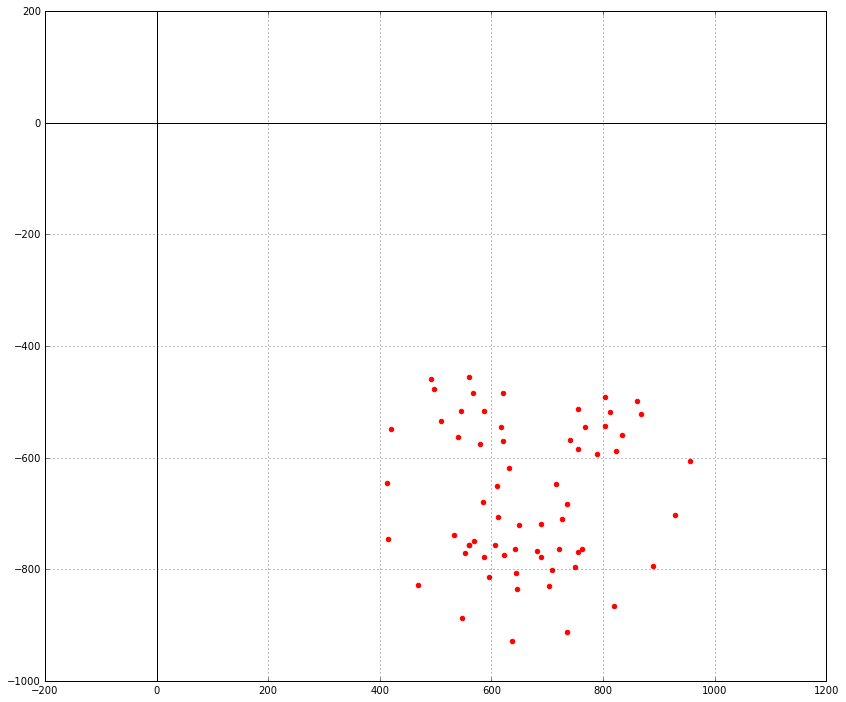

(64, 2)

In [106]:
fig = plt.figure()
fig.set_size_inches(20, 12)
plt.gca().set_aspect('equal', adjustable='box')
ax = fig.add_subplot(1,1,1)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
def show(points, c):
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(points[:,0], -points[:,1], color=c)
# Y2 = np.append(Y2, np.array(u1))
# Y2 = np.reshape(Y2, (-1, 2))
# rotated_arr2 = np.append(rotated_arr2, np.array(arr_u1))
# rotated_arr2 = np.reshape(rotated_arr2, (-1, 2))
# show(X, 'r')
# show(Y, 'g')
Z = np.concatenate((Z[:41][0::4], # face shape
                   Z[41:58][0::2], # nose
                   Z[58:72][0::2], # mouth
                   Z[72:88][0::3], # bottom part of mouth
                   Z[87:114][0::4], # inner lips of mouth
                   Z[114:154][0::3], # eyes
                   Z[154:][0::4])) # eyebrows

show(Z,'r')
# show(np.array([Z[193]]), 'g')
# show(np.array([Z[174]]), 'b')
# show(Y2, 'b')
# rotated_arr2 = rotated_arr2[:-1]

# show(arr, 'r')
# show(rotated_arr, 'g')
# show(rotated_arr2, 'b') # show(rotated_arr2 + arr_transform[2], 'b')
plt.show()
# x, x1, X
np.shape(Z)

In [ ]:
arr_transform = fd.calculateSimilarityTransform(arr, rotated_arr)
rotated_offset = np.transpose(np.dot(R, np.transpose(offset)))
rotated_arr2 = fd.applyTransform(arr_transform, rotated_arr)

In [ ]:
arr_transform

In [ ]:
math.acos(arr_transform[1][0][0])*180/math.pi

In [ ]:
def calculateSimilarityTransform(w, v):
    ''' Calculate similarity transform for a given face estimate '''
    center_w = np.sum(w, 0)*1./len(w)
    center_v = np.sum(v, 0)*1./len(v)
    B = np.dot(np.transpose(w - center_w), v - center_v) *1./len(w)
    U, s, V1 = np.linalg.svd(B)
    m = np.shape(U)[0]
    n = np.shape(V1)[1]
    S = np.zeros((m, n))
    S[:n, :n] = np.diag(s)
    M = np.zeros((m, n))
    if np.linalg.det(B) >= 0:
        M = np.identity(n)
    else:
        M[:n, :n] = np.diag(np.append(np.ones(n - 1), 1))
    R = np.dot(U, np.dot(M, V1))
    var = 1./len(v) * np.sum(np.linalg.norm((v - center_v), axis=1)**2)
    varw = 1./len(w) * np.sum(np.linalg.norm((w - center_w), axis=1)**2)
    c = 1./var*np.trace(np.dot(S, M))
    t = np.transpose(np.transpose(center_w) - c * np.dot(R, np.transpose(center_v)))
    return c, R, t
calculateSimilarityTransform(arr, rotated_arr)

In [ ]:
p = [(0, 3), (5, 1), (3, 4), (0, 5)]
p2 = [(1, 0), (4, 6), (1, 4), (2, 4)]
mu = np.sum(p, 0)*1./len(p)
mu2 = np.sum(p2, 0)*1./len(p2)
B = np.dot(np.transpose(p - mu), p2 - mu2)
B /= len(p)
C = np.zeros((2, 2))
for i in range(len(p)):
    a = np.reshape(np.transpose(p[i] - mu), (2, 1))
    a2 = np.reshape(np.transpose(p2[i] - mu2), (2, 1))
#     C += np.dot(np.transpose(p[i] - mu), p2[i] - mu2)
    C += np.dot(a, np.transpose(a2))
C /= len(p)
B, C

In [105]:
Z = np.array([[565.86, 758.98], [564.27, 781.14], [563.87, 805.77], [566.21, 829.85], [569.75, 856.19], [572.25, 879.97], [573.96, 903.9], [575.62, 927.81], [579.09, 951.88], [584.99, 976.82], [592.68, 999.08], [604.05, 1019.53], [620.67, 1039.42], [639.6, 1052.97], [662.17, 1061.08], [687.37, 1064.15], [711.45, 1063.29], [735.83, 1060.46], [759.23, 1057.], [784., 1055.01], [808.26, 1055.77], [833.62, 1058.76], [856.02, 1062.24], [881.1, 1065.92], [904.57, 1067.93], [929.8, 1066.78], [954.13, 1062.14], [977.24, 1055.55], [1000., 1043.93], [1020.58, 1031.31], [1036.16, 1012.32], [1042.18, 990.44], [1040.99, 965.53], [1039.17, 941.14], [1038.56, 917.83], [1039.86, 893.03], [1043.71, 869.05], [1048.2, 845.1], [1052.3, 821.12], [1057.33, 797.2], [1060.56, 770.77], [752.6, 712.25], [742.55, 728.55], [733.4, 745.75], [724.35, 763.55], [721.9, 782.4], [732.68, 797.74], [749.5, 805.94], [770.42, 810.42], [788.39, 812.92], [809.04, 812.37], [828.22, 811.89], [848.19, 807.53], [864.77, 798.53], [866.41, 779.55], [860.9, 760.99], [853.82, 742.76], [845.85, 723.8], [685.25, 895.38], [694.63, 881.73], [707.4, 869.73], [720.83, 859.55], [734.58, 850.37], [749.3, 843.86], [766.83, 843.38], [782.77, 847.13], [800.55, 847.13], [818.3, 847.13], [833.45, 852.37], [847.7, 860.31], [861.38, 869.73], [874.45, 880.83], [886.09, 893.71], [885.14, 910.72], [870.05, 916.11], [854.38, 920.35], [839.23, 925.65], [824.08, 930.85], [808.23, 934.88], [790.95, 935.88], [774.02, 934.13], [757.88, 930.9], [742.73, 925.64], [727.17, 921.15], [712.2, 915.34], [698.23, 906.85], [689., 894.63], [700.92, 888.2], [713.5, 883.63], [726.88, 880.6], [741.1, 879.38], [755.58, 880.13], [769.8, 881.37], [783.92, 882.81], [798.23, 883.88], [812.92, 883.63], [827.27, 884.63], [840.85, 887.23], [853.88, 890.85], [866.5, 895.38], [878.95, 900.4], [869.67, 897.89], [856.7, 894.13], [842.85, 892.13], [828.4, 891.38], [813.58, 891.38], [798.83, 891.56], [784.62, 892.88], [770.05, 892.42], [756.77, 889.15], [743.17, 886.63], [728.95, 885.38], [714.85, 886.85], [701.58, 890.11], [873.7, 662.51], [884.75, 657.49], [894.9, 649.81], [905.18, 642.53], [916.15, 637.05], [927.7, 633.26], [939.7, 630.26], [952.03, 632.49], [963.05, 637.83], [973.12, 645.69], [980.69, 655.88], [985.99, 666.93], [975.28, 672.94], [962.23, 673.76], [949.05, 673.26], [936.73, 671.01], [924.03, 669.51], [911.45, 667.76], [898.88, 666.01], [886.18, 664.51], [729.47, 648.85], [720.72, 640.1], [713.35, 630.73], [704.6, 622.1], [694.22, 617.35], [682.42, 616.37], [670.87, 618.38], [660.2, 622.12], [650.14, 627.69], [640.7, 634.87], [633.31, 644.23], [629.97, 655.1], [639.97, 660.35], [651.89, 661.6], [664.05, 660.85], [676.2, 660.1], [688.07, 658.75], [699.87, 657.38], [712.05, 656.6], [724.2, 657.35], [836.89, 582.14], [844.83, 567.7], [859.16, 559.37], [875.49, 555.9], [893.39, 555.64], [911.16, 556.14], [928.82, 556.89], [946.47, 557.64], [964.24, 558.14], [981.19, 560.41], [995.27, 569.3], [989.94, 583.64], [972.16, 583.14], [955.12, 585.14], [938.32, 587.64], [921.14, 589.39], [903.71, 590.64], [886.07, 591.39], [868.54, 592.39], [850.57, 592.32], [766.98, 578.98], [752.77, 565.77], [736.62, 557.79], [719.88, 551.76], [701.88, 548.26], [683.35, 545.76], [664.38, 544.26], [645.88, 546.77], [628.2, 551.], [611.83, 558.26], [598.25, 572.26], [615.48, 577.26], [634.1, 575.01], [652.73, 572.76], [671.73, 574.26], [689.98, 577.26], [707.67, 581.51], [724.8, 586.78], [741.55, 592.78], [760.03, 595.26]])
Z = np.array([[420., 548.], [416.99, 572.7], [414.24, 597.06], [413.78, 621.78], [412.66, 646.22], [411.51, 671.84], [411.23, 695.16], [411.52, 721.71], [414.54, 745.2], [421.24, 769.62], [431.34, 792.11], [449.04, 810.57], [467.71, 827.45], [486.98, 843.74], [506.57, 860.06], [525.75, 873.33], [547.31, 887.13], [568.83, 900.58], [590.59, 914.05], [611.18, 924.42], [637.18, 927.84], [661.4, 928.13], [686.05, 926.44], [712.01, 920.71], [735.34, 912.71], [759.06, 904.27], [780.52, 893.57], [802.8, 881.8], [819.94, 865.36], [839.71, 849.42], [859.34, 833.36], [875.33, 814.09], [889.32, 794.59], [903.3, 773.87], [915.14, 749.76], [922.02, 726.95], [929.37, 702.95], [939.08, 678.77], [946.01, 656.91], [952., 631.65], [955.95, 605.85], [631.5, 618.65], [622.54, 634.28], [609.31, 650.79], [594.12, 663.55], [585.23, 679.59], [595.01, 694.9], [612.35, 705.85], [630.5, 714.02], [648.45, 719.92], [669.34, 721.24], [688.02, 719.13], [707.37, 716.46], [726.51, 710.93], [742.61, 699.72], [736.06, 682.43], [723.35, 666.89], [716.1, 647.75], [533.35, 739.3], [550.18, 746.58], [568.65, 750.29], [587.85, 752.55], [606.43, 756.07], [624.2, 761.14], [642.98, 764.33], [662.18, 766.54], [682., 767.55], [701.33, 765.57], [721., 764.3], [741.3, 764.3], [761.47, 764.05], [763.03, 781.88], [749.05, 796.36], [734.28, 809.63], [718.88, 821.04], [702.45, 829.7], [685., 835.4], [665.73, 837.55], [646.28, 835.78], [628.15, 831.31], [611.1, 824.55], [595.45, 813.9], [580.83, 800.28], [566.68, 785.88], [553.4, 771.12], [542.19, 755.67], [545.6, 749.3], [560.18, 755.83], [575.7, 760.15], [591.48, 764.03], [606.65, 769.07], [622., 773.7], [637.8, 777.56], [654.48, 779.56], [671.78, 779.3], [688.7, 777.8], [705.75, 776.54], [722.68, 775.05], [739.12, 772.55], [755.45, 769.79], [752., 780.62], [738.15, 789.25], [723.5, 795.65], [708.48, 801.08], [693.2, 805.82], [677.1, 809.05], [660.05, 809.8], [643.83, 806.79], [628.38, 802.29], [613.53, 796.49], [599.33, 788.77], [585.9, 778.83], [572.53, 768.79], [559.03, 759.2], [740.05, 568.2], [748.35, 558.89], [758.1, 551.63], [768.2, 545.46], [778.82, 540.7], [791.52, 540.45], [803.12, 542.94], [814.07, 546.69], [824.62, 551.75], [833.95, 560.08], [838.32, 570.83], [833.75, 581.54], [823.82, 588.18], [812.88, 591.96], [801.15, 594.19], [788.45, 593.94], [776.82, 591.45], [765.6, 588.18], [754.65, 584.46], [744.3, 578.95], [622.72, 556.76], [617.96, 544.44], [609.68, 533.33], [598.92, 524.08], [587.27, 517.34], [573.48, 515.61], [559.2, 514.86], [545.67, 517.11], [532.73, 520.62], [520.6, 526.18], [509.7, 534.86], [518.4, 545.81], [528.75, 556.17], [540.33, 563.11], [552.42, 568.62], [565.2, 572.36], [578.62, 574.86], [593.15, 575.11], [607.05, 573.6], [619.97, 570.06], [755.76, 512.47], [764.29, 501.44], [776.28, 495.46], [789.74, 492.99], [804.03, 492.22], [818.49, 492.72], [832.78, 493.47], [846.81, 494.76], [859.99, 497.97], [872.18, 503.41], [883.88, 510.06], [882.73, 521.97], [868.41, 522.23], [854.71, 520.23], [840.63, 518.97], [826.34, 518.22], [811.66, 518.22], [797.11, 517.97], [783.03, 516.72], [769.09, 515.21], [621.06, 484.89], [608.11, 471.96], [593.38, 463.21], [577.38, 457.96], [559.88, 455.63], [542.11, 453.89], [524.34, 452.14], [506.46, 453.74], [490.81, 459.89], [476.26, 469.21], [461.81, 478.64], [479.74, 480.14], [497.13, 477.65], [514.68, 475.4], [533.31, 475.39], [550.43, 478.52], [566.63, 483.42], [582.43, 489.17], [598.16, 495.11], [614.98, 498.88]])
#